In [1]:
import pandas as pd
check3=pd.read_csv(r'cleaned_data2.csv')


📊 Ridge Regression Model Performance:
🔹 Train R² Score: 0.9988 | Test R² Score: 0.9988
🔹 Train MSE: 0.0012 | Test MSE: 0.0012
🔹 Train RMSE: 0.0346 | Test RMSE: 0.0344
🔹 Train MAE: 0.0207 | Test MAE: 0.0207

📊 Lasso Regression Model Performance:
🔹 Train R² Score: 0.9850 | Test R² Score: 0.9850
🔹 Train MSE: 0.0150 | Test MSE: 0.0150
🔹 Train RMSE: 0.1227 | Test RMSE: 0.1226
🔹 Train MAE: 0.1075 | Test MAE: 0.1075


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


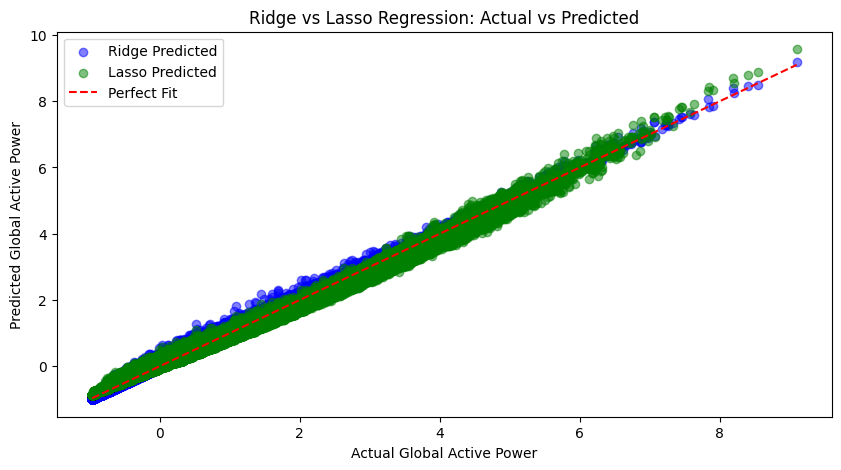

In [2]:
# ✅ Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ Load Data (Assuming `check2` is your preprocessed DataFrame)
X = check3.drop(columns=["Global_active_power"])  # Features
y = check3["Global_active_power"]  # Target Variable

# ✅ Split data into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Apply Polynomial Transformation (Optional, if you want non-linearity)
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 🔹 Train Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha (λ) for regularization strength
ridge_model.fit(X_train_poly, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_test_pred_ridge = ridge_model.predict(X_test_poly)

# 🔹 Train Lasso Regression Model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha (λ) for regularization strength
lasso_model.fit(X_train_poly, y_train)
y_train_pred_lasso = lasso_model.predict(X_train_poly)
y_test_pred_lasso = lasso_model.predict(X_test_poly)

# 🔹 Evaluate Ridge Regression
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)

ridge_train_rmse = np.sqrt(ridge_train_mse)
ridge_test_rmse = np.sqrt(ridge_test_mse)

ridge_train_mae = mean_absolute_error(y_train, y_train_pred_ridge)
ridge_test_mae = mean_absolute_error(y_test, y_test_pred_ridge)

ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

# 🔹 Evaluate Lasso Regression
lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)

lasso_train_rmse = np.sqrt(lasso_train_mse)
lasso_test_rmse = np.sqrt(lasso_test_mse)

lasso_train_mae = mean_absolute_error(y_train, y_train_pred_lasso)
lasso_test_mae = mean_absolute_error(y_test, y_test_pred_lasso)

lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

# ✅ Print Model Evaluation Metrics
print("\n📊 Ridge Regression Model Performance:")
print(f"🔹 Train R² Score: {ridge_train_r2:.4f} | Test R² Score: {ridge_test_r2:.4f}")
print(f"🔹 Train MSE: {ridge_train_mse:.4f} | Test MSE: {ridge_test_mse:.4f}")
print(f"🔹 Train RMSE: {ridge_train_rmse:.4f} | Test RMSE: {ridge_test_rmse:.4f}")
print(f"🔹 Train MAE: {ridge_train_mae:.4f} | Test MAE: {ridge_test_mae:.4f}")

print("\n📊 Lasso Regression Model Performance:")
print(f"🔹 Train R² Score: {lasso_train_r2:.4f} | Test R² Score: {lasso_test_r2:.4f}")
print(f"🔹 Train MSE: {lasso_train_mse:.4f} | Test MSE: {lasso_test_mse:.4f}")
print(f"🔹 Train RMSE: {lasso_train_rmse:.4f} | Test RMSE: {lasso_test_rmse:.4f}")
print(f"🔹 Train MAE: {lasso_train_mae:.4f} | Test MAE: {lasso_test_mae:.4f}")

# ✅ Visualization: Actual vs Predicted (Test Data)
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_test_pred_ridge, alpha=0.5, color="blue", label="Ridge Predicted")
plt.scatter(y_test, y_test_pred_lasso, alpha=0.5, color="green", label="Lasso Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")

plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Ridge vs Lasso Regression: Actual vs Predicted")
plt.legend()
plt.show()
